#**Mini Projet - Machine learning**

Travail fait par :
*   Kouki Emna
*   Ouelhazi Oumaima



Traitement de data non équilibrée : [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.offline import iplot
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# Importer les classifieurs:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

Chargement des données

In [2]:
#En utilisant Google Colab et Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [4]:
#En utilisant Jupyter
#data = pd.read_csv(r"C:\Users\Amna\Desktop\Cycle Ingénieur\Machine Learning\Mini Projet\Projet\creditcard.csv")

In [5]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape



(284807, 31)

  Il y a 284807 lignes et 31 colonnes

In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

=> Les features sont : 'Time' , 'Amount', 'Class' et 'V1'...'V28' 

In [8]:
# Vérifier s'il y a des valeurs nulles:
data.isnull().sum().max()

0

 => Cette Data ne contient pas de valeurs nulles.

In [9]:
# Vérifier s'il y a des doublons (lignes répétées) et et les supprimer
dataShape = data.shape[0]
data.drop_duplicates(subset = data.columns.values[:-1], keep ='first',inplace =True)
print("lignes supprimées = ", dataShape - data.shape[0])

lignes supprimées =  1081


 Cette Dataset conteint des doublons. 

In [10]:
data.shape


(283726, 31)

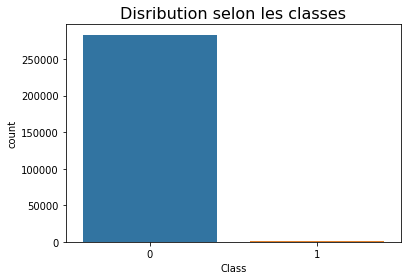

0    283253
1       473
Name: Class, dtype: int64


In [11]:
sns.countplot(x='Class',data=data)
plt.title('Disribution selon les classes', fontsize=16)
plt.show()

print(data.Class.value_counts())

####  => Il parait que notre Data n'est pas équilibrée

In [12]:
print('Pourcentage de non Frauds: {}%'.format(round(data.Class.value_counts()[0]/len(data) * 100.0, 3)))
print('Pourcentage de Frauds: {}%'.format(round(data.Class.value_counts()[1]/len(data) * 100.0, 3)))

Pourcentage de non Frauds: 99.833%
Pourcentage de Frauds: 0.167%


Oui, le pourcentage de la classe [1] = 0.167% < 10% 

## --> Imbalanced dataset

<Figure size 432x288 with 0 Axes>

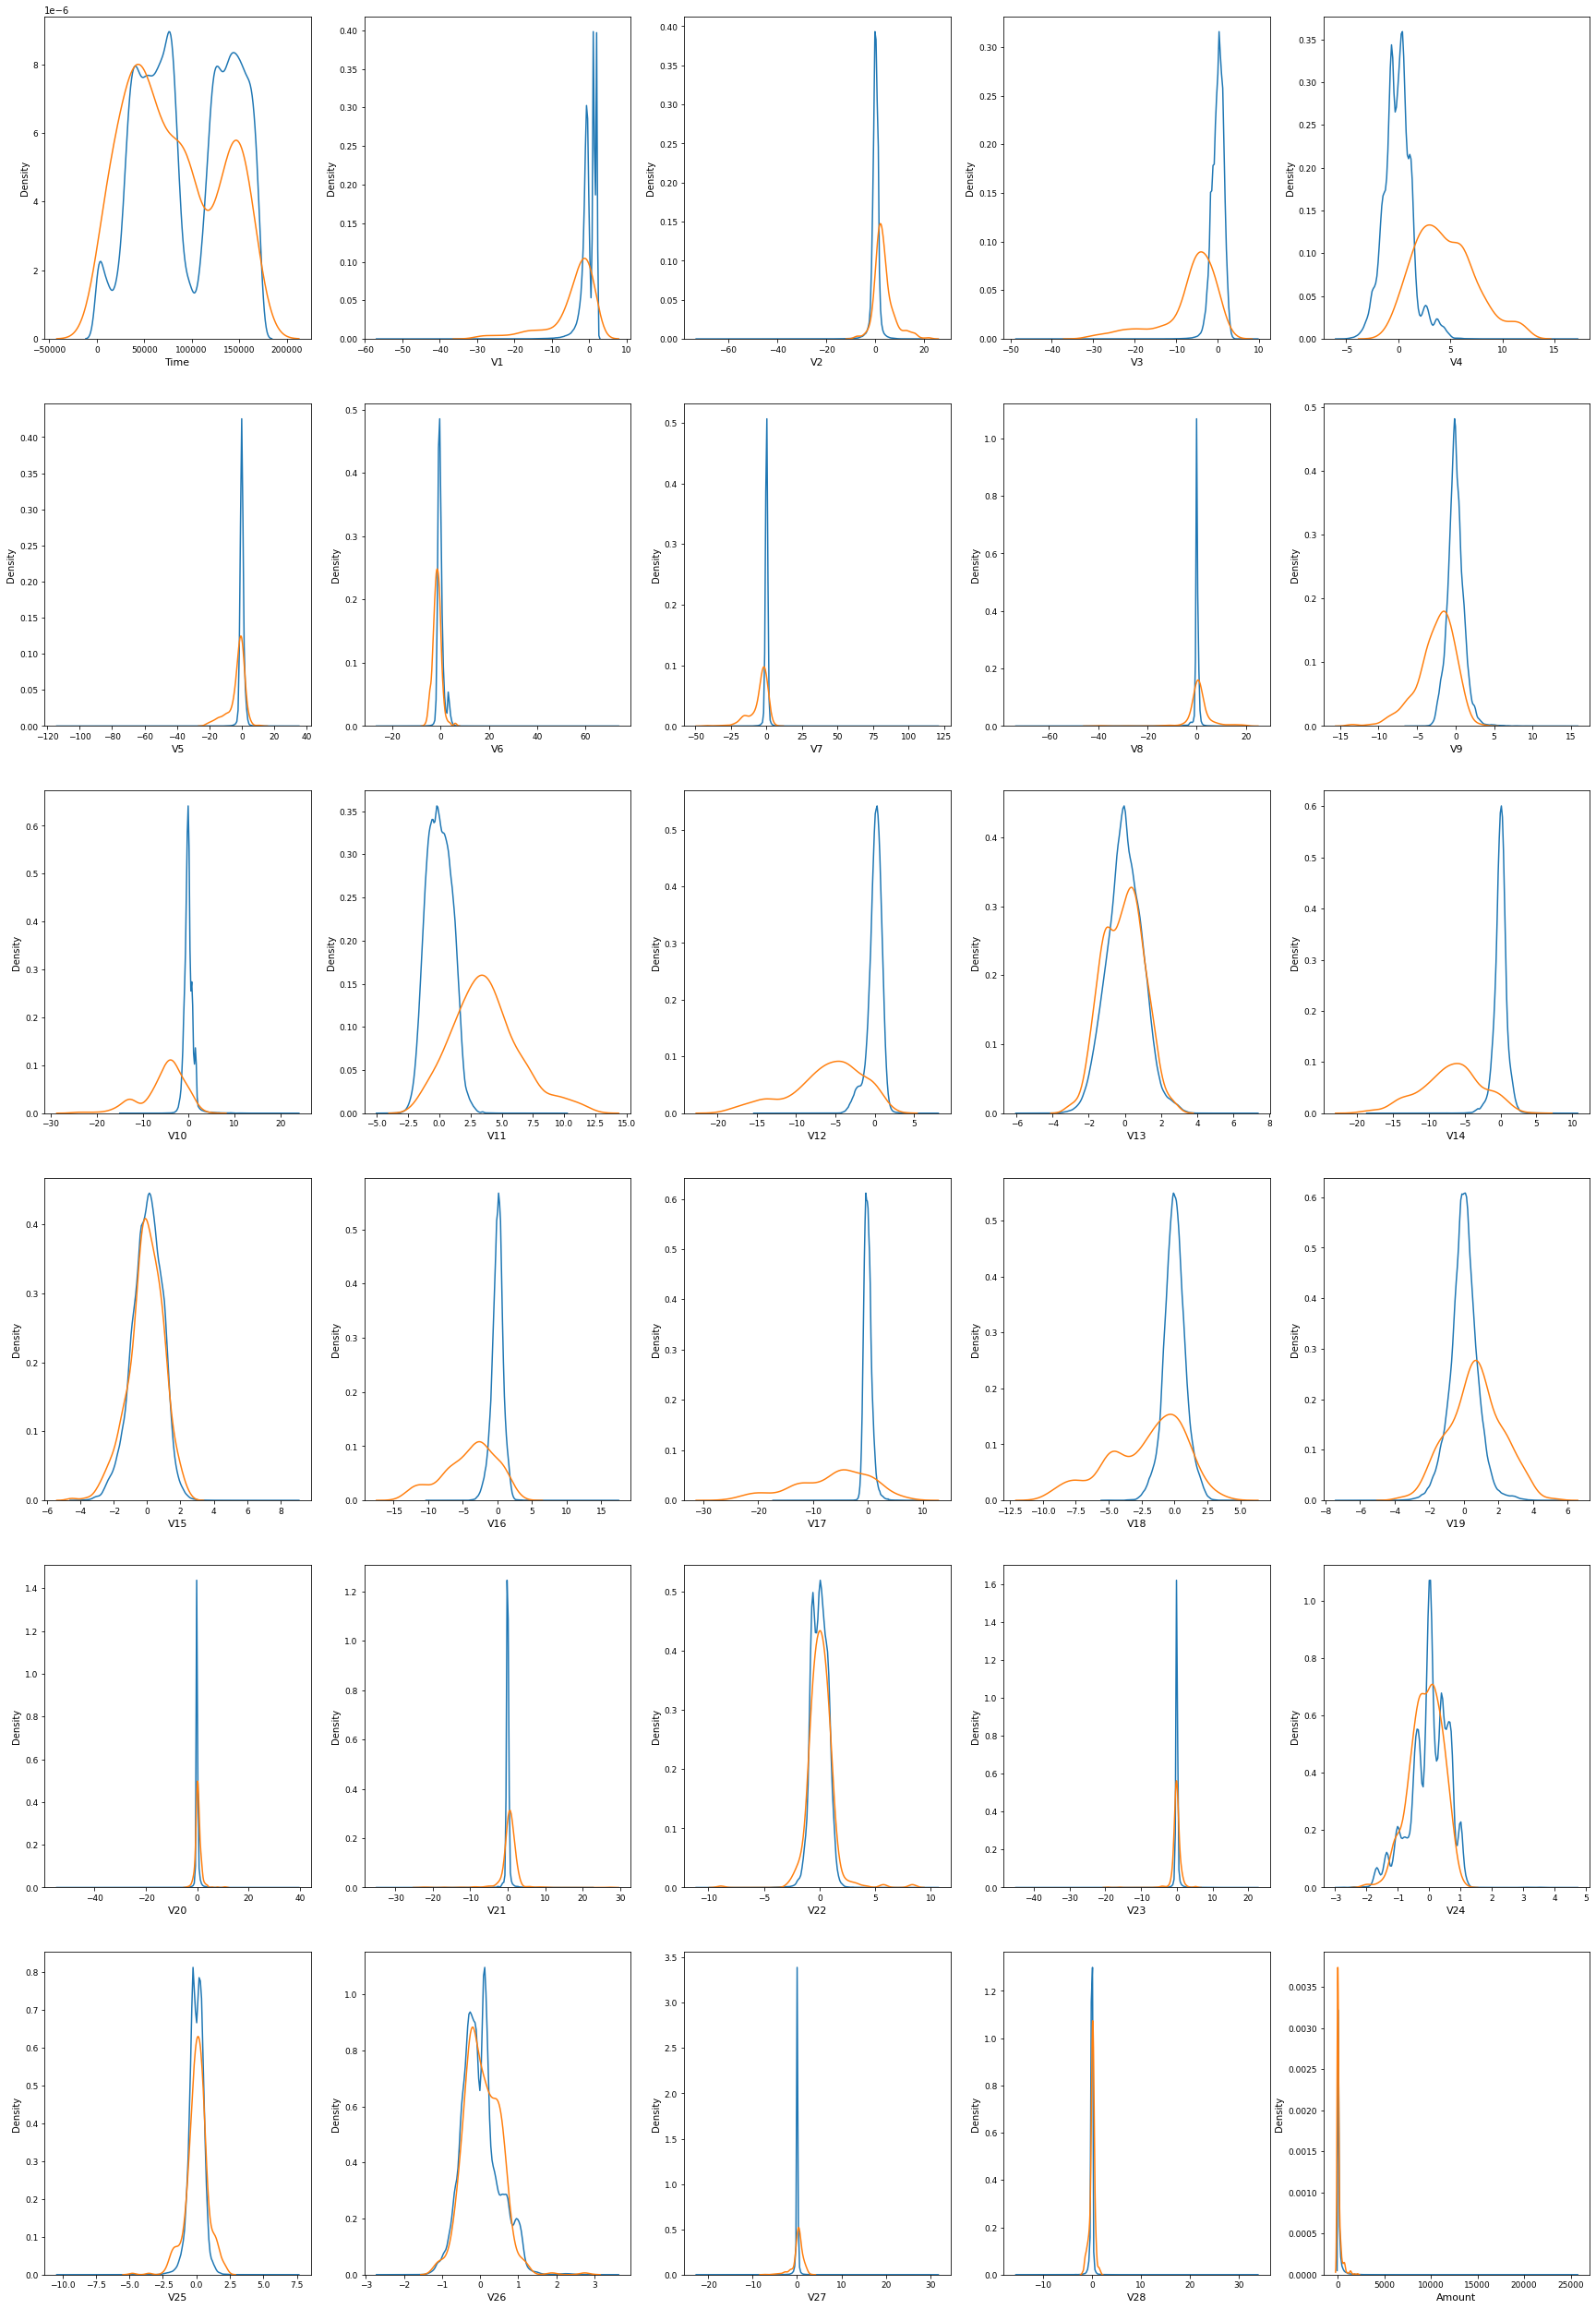

In [13]:
#Voir la distribution
def feature_distribution(data0,data1,label0,label1,features):
    plt.figure()
    fig,ax=plt.subplots(6,5,figsize=(30,45))
    
    i=0
    for feature in features:
        i = i + 1
        plt.subplot(6,5,i)
        sns.distplot(data0[feature], hist=False,label=label0)
        sns.distplot(data1[feature], hist=False,label=label1)
        plt.xlabel(feature, fontsize=11)
        plt.tick_params(axis='x', labelsize=9)
        plt.tick_params(axis='y', labelsize=9)
    plt.show()

data0 = data.loc[data['Class'] == 0]
data1 = data.loc[data['Class'] == 1]

features = data.columns.values[:30]
feature_distribution(data0,data1 ,'Normal', 'Fraud', features)

#### Disribution des transactions par rapport au temps 

In [14]:
class_0 = data.loc[data['Class'] == 0]["Time"]
class_1 = data.loc[data['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Non Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Densité de transactions par rapport au temps', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

# Classification 

In [15]:
#On va essayer plusieurs algorithmes 

## Classification KNN

k-NN ('K-nearest neighbor') est une technique d'apprentissage paresseux simple et non paramétrique utilisée pour classer les données en fonction des similitudes dans les métriques de distance telles que la distance Euclédienne, Manhattan, Minkowski ou Hamming.

In [16]:
#Préparation des données : 
x=data.iloc[:,:30]
y=data["Class"]

In [17]:
#Divisez des tableaux ou des matrices en sous-ensembles d'entraînement et de test aléatoires.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=42, stratify=y)
# test_size :float(entre 0.0 et 1.0) or int, default=None
#random_state: int, RandomState instance or None, default=None 
#(Contrôle le brassage (shuffling) appliqué aux données avant d'appliquer le fractionnement.)
#stratifyarray-like, default=None 
#(Si ce n'est pas Aucun, les données sont divisées de manière stratifiée, en utilisant ceci comme étiquettes de classe.)

In [ ]:
test_scores = []
train_scores = []
# 15 est le nbr de voisins
for i in range(1,3):
    #Créer KNN classifier
    knn = KNeighborsClassifier(i)
    
    #Ajuster le classificateur aux données pour former un nouveau modéle
    knn.fit(x_train,y_train) 
    
    #le score obtenu par le modèle entrainé sur les données d'entrainement
    train_scores.append(knn.score(x_train,y_train))

    #le score obtenu par le modèle entrainé sur les données de test
    test_scores.append(knn.score(x_test,y_test))


# append(): ajoute une nouvelle valeur à une clé existante dans un objet FormData ou ajoute la clé si elle n'existe pas déjà.

In [ ]:
#max_test_score
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 99.83611064117747 % and k = [2]


#### Visualisation du résultat

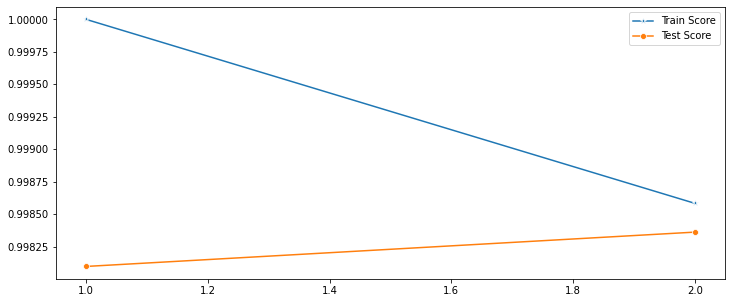

In [ ]:
# Resultat de Visualisation
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,3),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,3),test_scores,marker='o',label='Test Score')

#### Matrice de confusion

In [ ]:
# Affichez la matrice de confusion pour évaluer l'exactitude d'une classification.
knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train) 
print(confusion_matrix(y_test, knn.predict(x_test)))

[[94418     0]
 [  152     6]]


Text(0.5, 15.0, 'Predicted label')

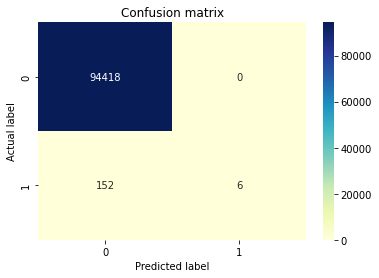

In [ ]:
#obtenons les prédictions en utilisant le classificateur que nous avions ajusté ci-dessus
#y_test: Valeurs cibles de vérité terrain (correctes).
# y_perd : Cibles estimées renvoyées par un classifieur.
y_pred = knn.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Rapport de classification

In [ ]:
acc = accuracy_score(y_test, y_test)
print("l'accuracy de ce modele est : ", acc , '%')

l'accuracy de ce modele est :  1.0 %


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94418
           1       1.00      0.04      0.07       158

    accuracy                           1.00     94576
   macro avg       1.00      0.52      0.54     94576
weighted avg       1.00      1.00      1.00     94576



La précision est le rapport entre les observations positives correctement prédites et le nombre total d'observations 
positives prédites.

Le rappel est le rapport entre les observations positives correctement prédites et toutes les observations de la classe réelle-oui.

Le score F1 est la moyenne pondérée de la précision et du rappel. Par conséquent, ce score prend en compte à la fois les faux positifs et les faux négatifs

#### optimisation :

In [ ]:
#dans le cas de KNN, le paramétre retourné est le best voisin
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

# Classification SVM

SVM (Support Vector Machine) est une famille d'algorithmes d'apprentissage automatique qui permet de résoudre des problèmes tant de classification que de régression ou de détection d’anomalie. Elle est connue pour sa solides garanties théoriques, sa grande flexibilité ainsi que sa simplicité d’utilisation même sans grande connaissance de data mining.


Le SVM est généralement associé avec l'apprentissage supervisé, mais il'y a des extensions comme OneClassSVM qui est un algorithme d'apprentissage non supervisé utilisé pour la détection d’anomalie.

In [ ]:
#SVM

Y = data['Class']
X = data.drop('Class',axis=1)

#Split data into 80% train and 20% test data.
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state=21)

#train_test_split : méthode pour diviser la matrice de la Dataset en deux portions: test et entrainement
#test_size : c'est la portion de la dataset dédiée pour le test ( 0.2 => 20% ) 
#random_state : Contrôle le brassage (Shaffle) des données avant de les diviser. 
#               Passez un int pour une sortie reproductible sur plusieurs appels

In [ ]:
# transformer les dataframes en des arrays
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(0)
X_train = X_train.values
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test = X_test.values
y_train = y_train.replace([np.inf, -np.inf], np.nan).fillna(0)
y_train = y_train.values
y_test = y_test.replace([np.inf, -np.inf], np.nan).fillna(0)
y_test = y_test.values

In [ ]:
#L'xecution est trop lente

In [ ]:

classification = OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, max_iter=-1)
classification.fit(X_train)
y_pred = classification.predict(X_train)

## Undersampling

In [21]:
#Récupération des données
normal = data[data["Class"] == 0]
fraud = data[data["Class"] == 1]

#
normal = normal.sample(n=492)
normal.Class.value_counts()



0    492
Name: Class, dtype: int64

0    492
1    473
Name: Class, dtype: int64


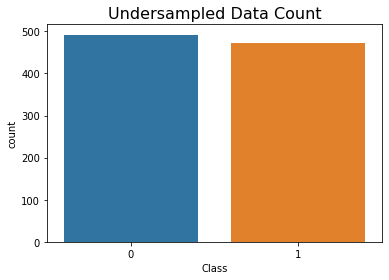

In [22]:
#Nouvelle distribution des données
data_UnderSampled = pd.concat([fraud,normal], axis = 0)
sns.countplot(data_UnderSampled["Class"]);
plt.title('Undersampled Data Count', fontsize=16)
print(data_UnderSampled.Class.value_counts())

In [23]:

Y = data_UnderSampled['Class']
X = data_UnderSampled.drop('Class',axis=1)

#Split data into 80% train and 20% test data.
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state=21)

#train_test_split : méthode pour diviser la matrice de la Dataset en deux portions: test et entrainement
#test_size : c'est la portion de la dataset dédiée pour le test ( 0.2 => 20% ) 
#random_state : Contrôle le brassage (Shaffle) des données avant de les diviser. 
#               Passez un int pour une sortie reproductible sur plusieurs appels


In [24]:
# transformer les dataframes en des arrays
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(0)
X_train = X_train.values
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test = X_test.values
y_train = y_train.replace([np.inf, -np.inf], np.nan).fillna(0)
y_train = y_train.values
y_test = y_test.replace([np.inf, -np.inf], np.nan).fillna(0)
y_test = y_test.values

In [25]:
classification = OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, max_iter=-1)
classification.fit(X_train)
y_pred = classification.predict(X_train)

In [26]:
#Afficher le rapport de la classification
print(classification_report(y_train,y_pred , zero_division = 0))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       390
           1       0.51      0.23      0.32       382

    accuracy                           0.12       772
   macro avg       0.17      0.08      0.11       772
weighted avg       0.25      0.12      0.16       772



Le score est de l'ordre de 0.11% 
==>  Résultat très faible

# Decision Tree Classification 

#### !! Ajouter description de l'algo

In [27]:
X = data_UnderSampled.drop(columns='Class', axis=1)
y = data_UnderSampled['Class']


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

decisionTreeModel = DecisionTreeClassifier()

In [29]:
# Entrainement du model
decisionTreeModel.fit(X_train,y_train);

In [30]:
cv_score = cross_val_score(decisionTreeModel, X_train, y_train, cv=5)
print("La classification de Decision Tree a un score d'accuracy : ", round(cv_score.mean(), 2) * 100, "% ")

La classification de Decision Tree a un score d'accuracy :  89.0 % 


## AdaBoost Classifier

AdaBoost est un ensemble de méta-algorithmes de boosting qui combinent plusieurs méthodes d'apprentissage automatique en un seul modèle prédictif pour augmenter les performances. Les sorties des autres algorithmes (appelés classifieurs faibles) sont combinées en une somme pondérée qui représente la sortie finale du classeur boosté. 

Les méthodes de ces classifieurs faibles peuvent réduire la variance à l'aide d'un " bagging approach", le biais à l'aide d'une approche de renforcement "boosting approach" ou améliorer les prédictions à l'aide d'une approche d'empilement "stacking approach".

##### Principe

Adaboost repose sur la sélection itérative de classifieur faible en fonction d'une distribution des exemples d'apprentissage. Chaque exemple est pondéré en fonction de sa difficulté avec le classifieur courant. C'est un exemple de la méthode des poids multiplicatifs

In [31]:
#Préparation des variables:
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

train_df, test_df = train_test_split(data, test_size=0.20, random_state=2018, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.20, random_state=2018, shuffle=True )

#train_test_split : méthode pour diviser la matrice de la Dataset en deux portions: test et entrainement
##Shuffle : S'il faut ou non mélanger les données avant de les diviser.
#random_state : Contrôle le brassage (Shaffle) des données avant de les diviser. 
#               Passez un int pour une sortie reproductible sur plusieurs appels
#test_size : c'est la portion de la dataset dédiée pour le test ( 0.2 => 20% ) 


In [32]:
#Preparation du modele

adaBoostClf = AdaBoostClassifier(random_state=2018,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=100)

#algorithm : Utilise l'algorithme de Boosting 'SAMME.R' qui converge plus rapidement que l'algorithme 'SAMME', 
#            afain d'obtenir une erreur de test plus inférieure avec moins d'itérations.
#RandomState : Contrôle le 'seed' aléatoire donnée à chaque estimateur de base à chaque itération de boosting.
#              Il n'est utilisé que lorsque l'estimateur de base est avec un random_state.
#              Passez un int pour une sortie reproductible sur plusieurs appels de fonction.
#learning_rate : Pondération appliquée à chaque classifieur à chaque itération de boosting.
#               Une pondération plus élevée augmente la contribution de chaque classifieur.
#n_estimators : nombre d'estimateurs maximal. Si l'entrainelment est parfait, l'entraiement est arrêté

In [33]:
adaBoostClf.fit(train_df[predictors], train_df['Class'].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [34]:
preds = adaBoostClf.predict(valid_df[predictors])

#### L'importance des features 

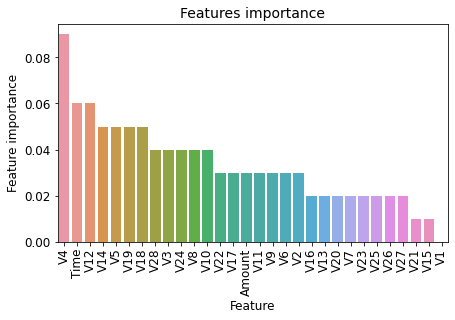

In [ ]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': adaBoostClf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

#### Confusion matrix

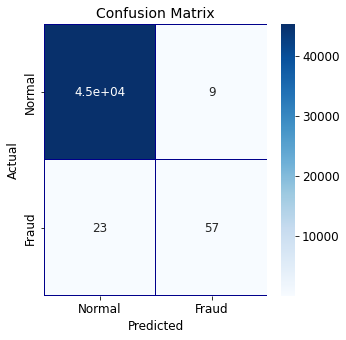

In [ ]:
#Visualisation de la matrice de confusion
confusion_matrix = pd.crosstab(valid_df['Class'].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(confusion_matrix, 
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
#Calcul de score de la classification AdaBoost
roc_auc_score(valid_df['Class'].values, preds)

0.8561506973254479

#Logistic Regression Classification

#### **Introduction:**

C'est un algorithme de classification d'apprentissage supervisé qui est utilisé pour prédire les observations d'un ensemble discret de classes. Pratiquement, il est utilisé pour classer les observations en différentes catégories. Par conséquent, sa sortie est de nature discrète

#### **Principe**

Le principe du modèle de la régression logistique est d'expliquer la survenance ou non d'un événement (la variable dépendante notée Y) par le niveau de variables explicatives (notées X). Par exemple, dans le domaine médical, on cherche à évaluer à partir de quelle dose d'un médicament, un patient sera guéri étant donné un ensemble d'observations.

L'algorithme de régression logistique nous aide à classer ces observations en deux ou plusieurs classes discrètes et il fonctionne en implémentant une équation linéaire avec des variables indépendantes ou explicatives pour prédire une valeur de réponse.

In [ ]:
#Par exemple, nous considérons l'exemple d'un nombre d'heures étudiées et la probabilité de réussite à l'examen.
#Ici, le nombre d'heures étudiées est la variable explicative et il est noté x1. 
#La probabilité de réussite à l'examen est la réponse ou la variable cible et elle est notée z.
#Si nous avons une variable explicative (x1) et une variable de réponse (z), alors 
#l'équation linéaire serait donnée mathématiquement avec l'équation suivante: z = β0 + β1x1 ou β0 et β1 les paramétres du modele
# equation générale : z = β0 + β1x1+ β2x2+……..+ βnxn 
# z est ensuite convertie en une valeur de probabilité comprise entre 0 et 1. 


# Nous utilisons la fonction sigmoïde pour mapper les valeurs prédites sur les valeurs de probabilité :1/(1+exp(-z))
#La fonction sigmoïde renvoie une valeur de probabilité comprise entre 0 et 1. 
#Cette valeur de probabilité est ensuite mappée à une classe discrète qui est soit "0" soit "1". 
#Afin de mapper cette valeur de probabilité à une classe discrète (réussite/échec, oui/non, vrai/faux), 
#nous sélectionnons une valeur seuil. Cette valeur seuil est appelée limite de décision. Au-dessus de cette valeur seuil,
#nous mapperons les valeurs de probabilité dans la classe 1 et en dessous de laquelle nous mapperons les valeurs dans la classe 0
#Mathématiquement, il peut être exprimé comme suit : -
#p ≥ 0,5 => classe = 1
#p < 0,5 => classe = 0
#Généralement, la limite de décision est fixée à 0,5
#Le modèle de régression logistique nécessite que la variable dépendante soit de nature binaire, multinomiale ou ordinale.

In [ ]:
#Implémentation de l'algorithme :
X = data.iloc[:,:30]
y = data['Class']

In [ ]:
#Diviser les données en un ensemble d'entraînement et de test distinct
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

cols = X_train.columns

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()
#Nous avons maintenant un ensemble de données X_train prêt à être introduit dans le classificateur de régression logistique.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,...,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000
mean,0.548715,0.958423,0.767209,0.778495,0.250945,0.547749,0.522374,0.497149,0.785361,0.462754,...,0.415385,0.561464,0.510030,0.658644,0.412523,0.536292,0.418822,0.650014,0.257053,0.004488
std,0.274820,0.033066,0.017296,0.035554,0.063394,0.017715,0.026451,0.013840,0.012729,0.037707,...,0.011228,0.011664,0.033762,0.010868,0.088449,0.032104,0.079719,0.011239,0.007118,0.012292
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313665,0.942734,0.760928,0.757454,0.212955,0.538764,0.507056,0.490844,0.783141,0.440593,...,0.412247,0.557798,0.484739,0.655738,0.360622,0.516691,0.364744,0.647934,0.255889,0.000285
50%,0.490237,0.958670,0.767923,0.782699,0.250094,0.547012,0.516917,0.497617,0.785619,0.461033,...,0.414461,0.561005,0.510370,0.658444,0.418477,0.537339,0.410176,0.650009,0.257297,0.001121
75%,0.806109,0.980648,0.775669,0.802673,0.284288,0.555674,0.530342,0.503654,0.788881,0.483342,...,0.417364,0.564478,0.534694,0.661293,0.476680,0.557954,0.458592,0.652591,0.258765,0.003953
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Entrainement du modele :

In [ ]:
# former un modèle de régression logistique sur l'ensemble d'apprentissage
from sklearn.linear_model import LogisticRegression
# instancier le modèle
logreg = LogisticRegression(solver='liblinear', random_state=0)
# adapter le modèle
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
#Prediction des resultats
y_pred_test = logreg.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#probabilité d'obtenir une sortie égale à 0 
y_pred_0 = logreg.predict_proba(X_test)[:,0]

#probabilité d'obtenir une sortie égale à 1 
y_pred_1 = logreg.predict_proba(X_test)[:,1]

print("probabilité d'obtenir une sortie égale à 0 : ", y_pred_0)
print("probabilité d'obtenir une sortie égale à 1 : ", y_pred_1)

probabilité d'obtenir une sortie égale à 0 :  [0.99933277 0.9998081  0.99970083 ... 0.99978519 0.99986666 0.99860774]
probabilité d'obtenir une sortie égale à 1 :  [0.00066723 0.0001919  0.00029917 ... 0.00021481 0.00013334 0.00139226]


In [ ]:
#Vérifier le score de précision

print('Score de précision du modèle : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
#Ici, y_test sont les véritables étiquettes de classe 
#y_pred_test sont les étiquettes de classe prédites dans l'ensemble de test.

Score de précision du modèle : 0.9989


In [ ]:
# comparer la précision de l'ensemble de train et de l'ensemble de test pour vérifier le surajustement.
y_pred_train = logreg.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Score de précision de l ensemble d entrainement : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Score de précision de l ensemble d entrainement : 0.9991


In [ ]:
#les scores sur l'ensemble d'entraînement et de test
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9991
Test set score: 0.9989


Le score de précision de l'ensemble d'apprentissage est de 0,9 tandis que la précision de l'ensemble de test est de 0,9. 

Ces deux valeurs sont egaux . Il n'est donc pas question de surdosage.

Dans la régression logistique, nous utilisons la valeur par défaut de *C = 1*. 
Elle offre de bonnes performances avec une précision d'environ 85 % sur l'ensemble d'entraînement et de test. 

Mais les performances du modèle sur l'ensemble d'entraînement et de test sont très comparables. 

Il s'agit probablement d'un sous-ajustement.
Je vais augmenter C et adapter un modèle plus flexible.

In [ ]:
# fit the Logsitic Regression model with C=10

logreg10 = LogisticRegression(C=10, solver='liblinear', random_state=0)
logreg10.fit(X_train, y_train)

LogisticRegression(C=10, random_state=0, solver='liblinear')

In [ ]:
print('Training set score: {:.4f}'.format(logreg10.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg10.score(X_test, y_test)))

Training set score: 0.9992
Test set score: 0.9990


In [ ]:
#vérifier la distribution des classes dans le jeu de test
y_test.value_counts()
#Nous pouvons voir que les occurrences de la classe la plus fréquente sont  56861. 
#Nous pouvons donc calculer une précision nulle en divisant  56861 par le nombre total d'occurrences.

0    56659
1       87
Name: Class, dtype: int64

In [ ]:
null_accuracy = (56861/(56861+101))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9982


Nous pouvons voir que le score de précision de notre modèle est de 0,99 mais que le score de précision nul est de 0,99. 

Nous pouvons donc conclure que notre modèle de régression logistique fait un très bon travail pour prédire les étiquettes 
de classe.

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[56648    11]
 [   50    37]]

True Positives(TP) =  56648

True Negatives(TN) =  37

False Positives(FP) =  11

False Negatives(FN) =  50


(TP) - Les vrais positifs se produisent lorsque nous prédisons qu'une observation appartient à une certaine classe et 
que l'observation appartient réellement à cette classe.

(TN) - Les vrais négatifs se produisent lorsque nous prédisons qu'une observation n'appartient pas à une certaine classe et que l'observation
n'appartient en fait pas à cette classe.

(FP) - Les faux positifs se produisent lorsque nous prédisons qu'une observation appartient à une certaine classe, 
mais que l'observation n'appartient en fait pas à cette classe. Ce type d'erreur est appelé erreur de type I.

(FN) - Les faux négatifs se produisent lorsque nous prédisons qu'une observation n'appartient pas à une certaine classe, 
mais que l'observation appartient en fait à cette classe. Il s'agit d'une erreur très grave appelée erreur de type II.

### Visualisation

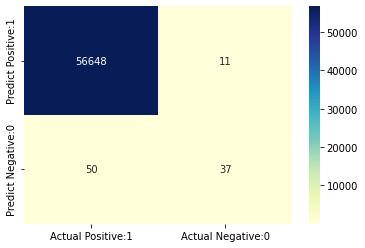

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#rapport de classification

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.77      0.43      0.55        87

    accuracy                           1.00     56746
   macro avg       0.88      0.71      0.77     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9989


In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

Classification error : 0.0011
Recall or Sensitivity : 0.9991
True Positive Rate : 0.9991
False Positive Rate : 0.2292


In [ ]:
#Dans chaque ligne, les nombres totalisent 1.
#Il y a 2 colonnes qui correspondent à 2 classes - 0 et 1.

#Classe 0 - probabilité prédite que la carte de credit est bonne.
#Classe 1 - probabilité prédite que la carte de credit est fraude.



####**Importance des probabilités prédites**

On peut classer les observations par probabilité de carte fraude ou non.
processus predict_proba

Prédit les probabilités

Choisissez la classe avec la probabilité la plus élevée

Seuil de classement

Il existe un seuil de classification de 0,5.

Classe 1 - la probabilité de bonne carte e est prédite si probabilité > 0,5.
Classe 0 - la probabilité de carte fraude est prédite si la probabilité < 0,5.


In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No fraud detection  (0)', 'Prob of - fraud detection (1)'])

y_pred_prob_df

,Prob of - No fraud detection (0),Prob of - fraud detection (1)
0,0.999333,0.000667
1,0.999808,0.000192
2,0.999701,0.000299
3,0.999026,0.000974
4,0.999718,0.000282
5,0.999133,0.000867
6,0.999327,0.000673
7,0.999731,0.000269
8,0.919762,0.080238
9,0.999628,0.000372


Text(0, 0.5, 'Frequency')

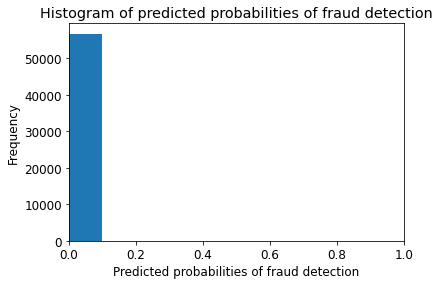

In [ ]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]
# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of fraud detection')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of fraud detection')
plt.ylabel('Frequency')

-> Nous pouvons voir que l'histogramme ci-dessus est fortement asymétrique.
La première colonne nous indique qu'il y a environ 60 000 observations avec une probabilité comprise entre 0,0 et 0,1.

Il existe un petit nombre d'observations avec une probabilité > 0,5.
Ainsi, pas de nombres d'observations prédit qu'il y aura des cartes fraud.
La majorité des observations prédisent qu'il n'y aura pas detection de fraude dans les cartes.

#Random Forest Classification

Le random forest est un algorithme d'apprentissage automatique supervisé basé sur l'apprentissage d'ensemble. 
c’est un algorithme qui se base sur l’assemblage d’arbres de décision. 

**Random forest = tree bagging + feature sampling**

*tree bagging :*  processus de tirage aléatoire sur les observations (lignes de données)

1.   Construction de n arbres de décisions en tirant aléatoirement n   échantillons d’observations
2.   Entraînement de chaque arbre de décision
3.   Pour faire une prévision sur de nouvelles données, il faut appliquer  chacun de n arbres et prendre la majorité parmi les n prévisions.





*feature sampling* : processus de tirage aléatoire sur les variables (colonnes de données)

reprendre notre exemple de creditcard , l’idée de base du feature sampling c’est de demander à chaque banque d’étudier 
votre demande de vérifier la carte à partir d’un accès limité aux informations du client.
L’une des banques rendra sa décision en ayant, par exemple, uniquement accès aux informations relatifs au v1, v2 et 
v3 du client. Une autre banque quant à elle, aura uniquement pris connaissance des informations relatives au v4 
v5 et v6 du client
Ce processus permet de baisser la corrélation entre les arbres qui pourrait perturber la qualité des résultats. 
En statistique, on dit que le feature sampling permet de réduire la variance de l’ensemble créé.
Il existe différents critères de séparation pour construire un arbre : 
    critère de Gini :organise la séparation des feuilles d’un arbre en se 

*   critère de Gini :organise la séparation des feuilles d’un arbre en se focalisant sur la classe la plus représentée dans le jeu de données
*   critère d’entropie est basé sur la mesure du désordre (comme en thermodynamique) qui règne dans la population étudiée



Dans ce noyau, j'ai construit un modèles Random Forest Classifier pour prédire la validité des cartes de credits avec 10 et 
100 arbres de décision 

In [ ]:
X = data.iloc[:,:30]
y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
#Modèle Forest Classifier avec paramètres par défaut

# instancier le classificateur
rfc = RandomForestClassifier(random_state=0)
# adapter le modèle
rfc.fit(X_train, y_train)
# Prédire les résultats de l'ensemble de tests
y_pred = rfc.predict(X_test)
# Vérifier le score de précision
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9996


In [ ]:
#Modèle de classificateur de forêt aléatoire avec paramètre n_estimators=100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9996


Le score de précision du modèle avec 10 arbres de décision est 0.9996, le même avec 100 arbres de décision est de 0,9996.mais en general, la précision attendue augmente avec le nombre d'arbres de décision dans le modèle.

Jusqu'à présent, j'ai utilisé toutes les fonctionnalités données dans le modèle. 
Maintenant, je vais sélectionner uniquement les fonctionnalités importantes, construire le modèle à l'aide de ces fonctionnalités et voir son effet sur la précision.

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

V14       0.144110
V17       0.122706
V12       0.122573
V10       0.099271
V16       0.070274
V11       0.069479
V9        0.043981
V18       0.030107
V7        0.023281
V4        0.020194
V26       0.018815
V6        0.017358
V21       0.017131
V20       0.016447
V3        0.016391
V8        0.014790
V1        0.013248
Time      0.012394
V19       0.012122
Amount    0.012001
V5        0.011894
V15       0.011853
V2        0.011329
V22       0.011300
V27       0.010842
V28       0.010674
V25       0.009335
V13       0.008948
V24       0.008812
V23       0.008339
dtype: float64

Nous pouvons voir que la caractéristique la **plus importante** est v14 et v17 et la caractéristique la moins importante est v23

####Visualisation des features importants

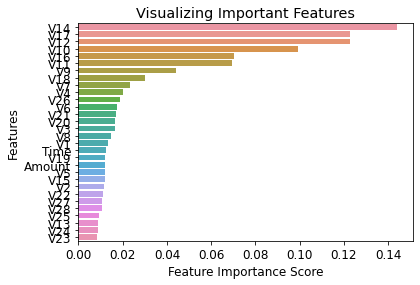

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

####Confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[93477     6]
 [   36   111]]


####Classification

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93483
           1       0.95      0.76      0.84       147

    accuracy                           1.00     93630
   macro avg       0.97      0.88      0.92     93630
weighted avg       1.00      1.00      1.00     93630

